## Import

In [1]:
import pandas as pd
import numpy as np
import os
import json


from itertools import takewhile, dropwhile
from collections import Counter

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import dataframes_util as ut

# Import base dataframe and controlled users

In [2]:
if (not os.path.isfile('../tweets.csv')):
    %run Tweet_preparation.ipynb

dfPosts = pd.read_csv('../tweets.csv',low_memory=False)

In [3]:
dfPosts

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,user_code_error,rt_user_code_error,in_reply_to_user_code_error,is_self_rt,user_url_cred,rt_user_url_cred,in_reply_to_user_url_cred
0,1311804409903484930,1311804409903484930,Thu Oct 01 23:05:18 +0000 2020,1035959506700783618,alessia_smile6,False,Sat Sep 01 18:36:08 +0000 2018,Altri tre giorni di blocco per aver citato un ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
1,1311813787159130117,1311813787159130117,Thu Oct 01 23:42:33 +0000 2020,113584953,GiornaledPuglia,False,Fri Feb 12 09:11:24 +0000 2010,"Covid, vaccino AstraZeneca alla prova dell'Age...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2,1311805637303644161,1311805637303644161,Thu Oct 01 23:10:10 +0000 2020,1279710942020984832,TestPerTutti,False,Sun Jul 05 09:37:48 +0000 2020,https://t.co/oQZpHUBKrt,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.00,1.00,NaN
3,1311798617578049538,1311798617578049538,Thu Oct 01 22:42:17 +0000 2020,1215779772762148865,CapitanHarlok6,False,Fri Jan 10 23:37:56 +0000 2020,"""Dobbiamo resistere con il coltello tra i dent...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.90,NaN,NaN
4,1311806869917388801,1311806869917388801,Thu Oct 01 23:15:04 +0000 2020,2660808424,soteros1,False,Tue Jul 01 17:29:02 +0000 2014,Se volevate sapere perché Burioni viene invita...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.62,0.77,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053196,1394609996197937159,1394609996197937159,Tue May 18 11:05:08 +0000 2021,464822421,CiaoGrosso,False,Sun Jan 15 17:25:21 +0000 2012,Il medico testimonial pro vaccino a @Ariacheti...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,102577.0,1060.0,1114.0,NaN,NaN,NaN,False,0.33,1.00,NaN
4053197,1394610015823147011,1394610015823147011,Tue May 18 11:05:13 +0000 2021,497188910,Rosskitty77,False,Sun Feb 19 18:26:36 +0000 2012,"""...«Ha lividi e piastrine basse». E ha richie...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,79297.0,772.0,893.0,NaN,NaN,NaN,False,0.58,NaN,NaN
4053198,1394609887641022464,1394609887641022464,Tue May 18 11:04:42 +0000 2021,955571652468801536,GuidoIafrate,False,Mon Jan 22 22:43:30 +0000 2018,"Vaccinazioni nei luoghi di lavoro, fondamental...","<a href=""http://twitter.com/download/android"" ...",NaN,...,655.0,226.0,55.0,NaN,NaN,NaN,False,NaN,NaN,NaN
4053199,1394609899963830275,1394609899963830275,Tue May 18 11:04:45 +0000 2021,57358236,lucabattanta,False,Thu Jul 16 15:14:03 +0000 2009,A #lariachetira c’è un MEDICO DI BASE che ha a...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,517677.0,13671.0,20847.0,NaN,NaN,NaN,False,0.81,0.89,NaN


In [4]:
with open('listControlledUsers.json') as f:
    listControlledUsers = json.load(f)

## Filtered by retweet (with differents graph)

### High credibility

#### Retweeted by an high credibility user

#### Retweet  an high credibility user

In [5]:
userHighCred = listControlledUsers['Provax']
print ("Generation ",0, ": ",len(userHighCred))

Generation  0 :  63


In [6]:
#Account that have retweeted a suspect (follower)
dfRetweet = pd.DataFrame()
dfRetweet = ut.retweet_a_suspect(dfPosts,userHighCred)

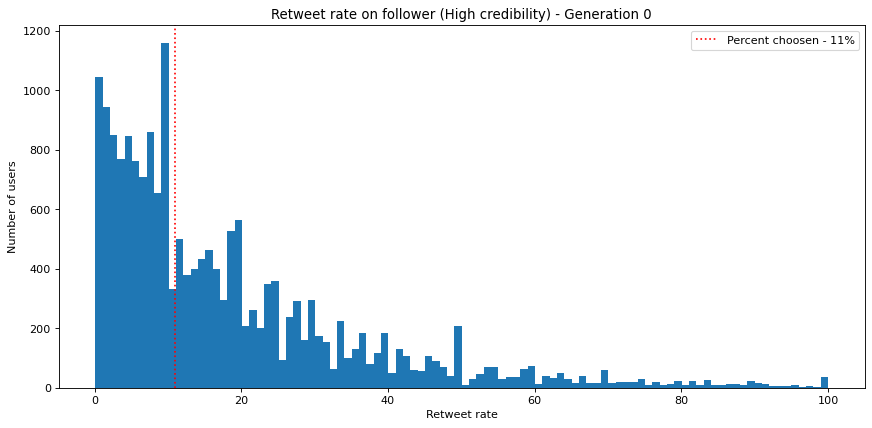

In [7]:
figure(figsize=(13, 6), dpi=80)
percent_choosen = 11

plt.hist(dfRetweet[dfRetweet['rt_rate']>0]["rt_rate"],bins=100)
plt.axvline(percent_choosen,color='red',ls=':',label="Percent choosen - %d%%"%percent_choosen)

plt.xlabel('Retweet rate')
plt.ylabel("Number of users")
plt.title("Retweet rate on follower (High credibility) - Generation 0")

plt.legend()
plt.show()

In [8]:
#Account that have retweeted a suspect (follower)
userHighCred = userHighCred + list(dfRetweet[dfRetweet['rt_rate']>=percent_choosen].index)
print ("Generation ",1, ": ",len(userHighCred))
dfRetweet = ut.retweet_a_suspect(dfPosts,userHighCred)

Generation  1 :  10029


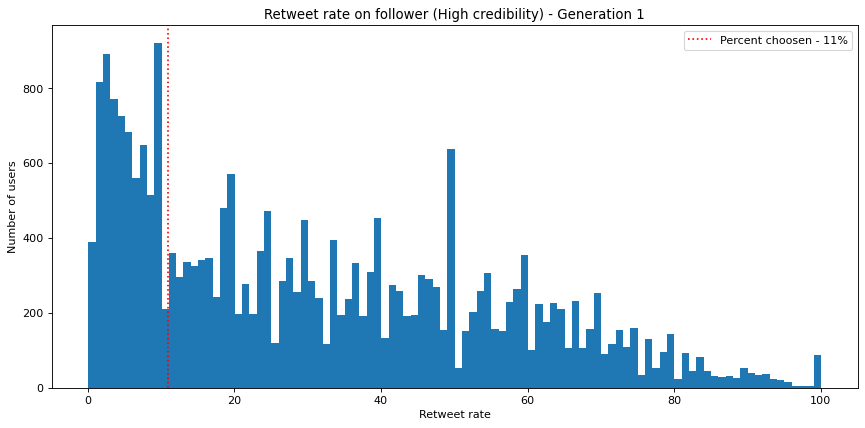

In [9]:
figure(figsize=(13, 6), dpi=80)
percent_choosen = 11

plt.hist(dfRetweet[dfRetweet['rt_rate']>0]["rt_rate"],bins=100)
plt.axvline(percent_choosen,color='red',ls=':',label="Percent choosen - %d%%"%percent_choosen)

plt.xlabel('Retweet rate')
plt.ylabel("Number of users")
plt.title("Retweet rate on follower (High credibility) - Generation 1")

plt.legend()
plt.show()

In [10]:
userHighCred = userHighCred + list(dfRetweet[dfRetweet['rt_rate']>=percent_choosen].index)
print ("Generation ",2, ": ",len(userHighCred))
dfProvax = dfPosts[dfPosts.isin(userHighCred)['user_screen_name']].copy()

Generation  2 :  27501


### NoVax

#### Retweeted by a suspect
Any user that is defined as a novax that retweets a user, the retweeted user will automatically be considered a novax

#### Retweet a suspect

In [11]:
userNovax = listControlledUsers['Novax']
print ("Generation ",0, ": ",len(userNovax))

Generation  0 :  57


In [12]:
#Account that have retweeted a suspect (follower)
dfRetweet = pd.DataFrame()
dfRetweet = ut.retweet_a_suspect(dfPosts,userNovax)

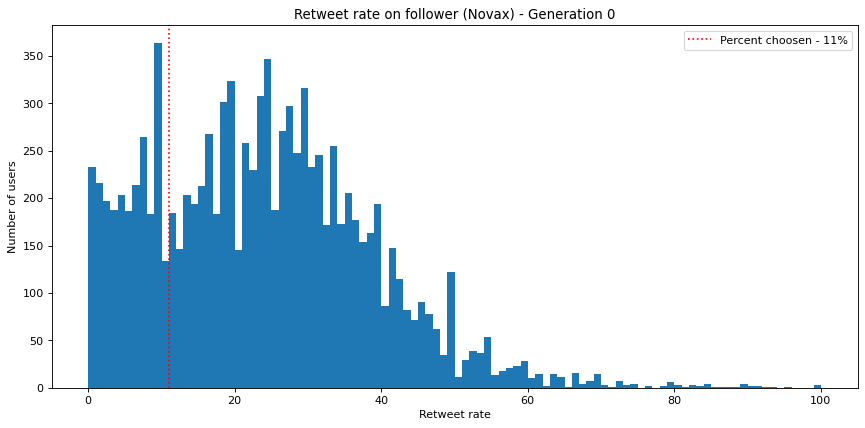

In [13]:
figure(figsize=(13, 6), dpi=80)
percent_choosen = 11

plt.hist(dfRetweet[dfRetweet['rt_rate']>0]["rt_rate"],bins=100)
plt.axvline(percent_choosen,color='red',ls=':',label="Percent choosen - %d%%"%percent_choosen)

plt.xlabel('Retweet rate')
plt.ylabel("Number of users")
plt.title("Retweet rate on follower (Novax) - Generation 0")

plt.legend()
plt.show()

In [14]:
#Account that have retweeted a suspect (follower)
userNovax = userNovax + list(dfRetweet[dfRetweet['rt_rate']>=percent_choosen].index)
print ("Generation ",1, ": ",len(userNovax))
dfRetweet = ut.retweet_a_suspect(dfPosts,userHighCred)

Generation  1 :  7971


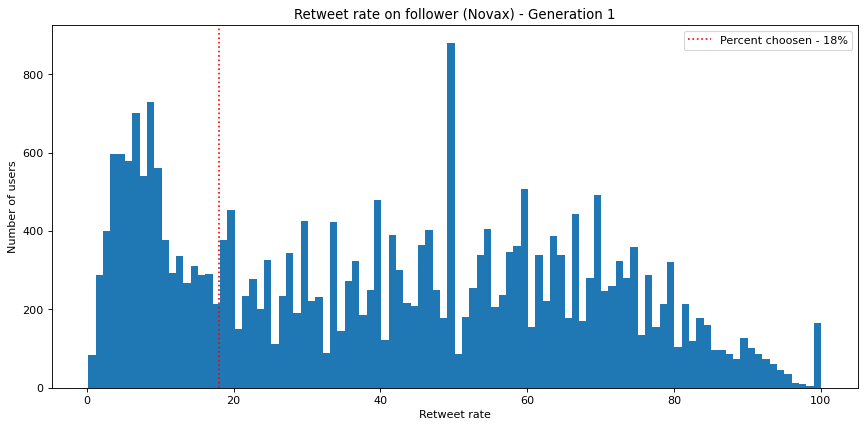

In [15]:
figure(figsize=(13, 6), dpi=80)
percent_choosen = 18

plt.hist(dfRetweet[dfRetweet['rt_rate']>0]["rt_rate"],bins=100)
plt.axvline(percent_choosen,color='red',ls=':',label="Percent choosen - %d%%"%percent_choosen)

plt.xlabel('Retweet rate')
plt.ylabel("Number of users")
plt.title("Retweet rate on follower (Novax) - Generation 1")

plt.legend()
plt.show()

In [16]:
userNovax = userNovax + list(dfRetweet[dfRetweet['rt_rate']>=percent_choosen].index)
print ("Generation ",2, ": ",len(userNovax))
dfNovax = dfPosts[dfPosts.isin(userNovax)['user_screen_name']].copy()

Generation  2 :  27613


# .CSV Creation 

### Novax

In [17]:
dfNovax.drop_duplicates(['id'],inplace=True)
dfNovax

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,user_code_error,rt_user_code_error,in_reply_to_user_code_error,is_self_rt,user_url_cred,rt_user_url_cred,in_reply_to_user_url_cred
0,1311804409903484930,1311804409903484930,Thu Oct 01 23:05:18 +0000 2020,1035959506700783618,alessia_smile6,False,Sat Sep 01 18:36:08 +0000 2018,Altri tre giorni di blocco per aver citato un ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
2,1311805637303644161,1311805637303644161,Thu Oct 01 23:10:10 +0000 2020,1279710942020984832,TestPerTutti,False,Sun Jul 05 09:37:48 +0000 2020,https://t.co/oQZpHUBKrt,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.00,1.00,NaN
3,1311798617578049538,1311798617578049538,Thu Oct 01 22:42:17 +0000 2020,1215779772762148865,CapitanHarlok6,False,Fri Jan 10 23:37:56 +0000 2020,"""Dobbiamo resistere con il coltello tra i dent...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.90,NaN,NaN
4,1311806869917388801,1311806869917388801,Thu Oct 01 23:15:04 +0000 2020,2660808424,soteros1,False,Tue Jul 01 17:29:02 +0000 2014,Se volevate sapere perché Burioni viene invita...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.62,0.77,NaN
5,1311806204973404161,1311806204973404161,Thu Oct 01 23:12:26 +0000 2020,607187088,Pattyjune22,False,Wed Jun 13 10:53:22 +0000 2012,"Il vaccino contro HPV è sicuro, efficace, grat...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053195,1394610031262306304,1394610031262306304,Tue May 18 11:05:16 +0000 2021,4309630395,Ileana0406,False,Sat Nov 28 18:18:40 +0000 2015,"Vaccini, nuovo errore di somministrazione in T...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,21105.0,1130.0,833.0,NaN,NaN,NaN,False,NaN,1.00,NaN
4053196,1394609996197937159,1394609996197937159,Tue May 18 11:05:08 +0000 2021,464822421,CiaoGrosso,False,Sun Jan 15 17:25:21 +0000 2012,Il medico testimonial pro vaccino a @Ariacheti...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,102577.0,1060.0,1114.0,NaN,NaN,NaN,False,0.33,1.00,NaN
4053197,1394610015823147011,1394610015823147011,Tue May 18 11:05:13 +0000 2021,497188910,Rosskitty77,False,Sun Feb 19 18:26:36 +0000 2012,"""...«Ha lividi e piastrine basse». E ha richie...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,79297.0,772.0,893.0,NaN,NaN,NaN,False,0.58,NaN,NaN
4053199,1394609899963830275,1394609899963830275,Tue May 18 11:04:45 +0000 2021,57358236,lucabattanta,False,Thu Jul 16 15:14:03 +0000 2009,A #lariachetira c’è un MEDICO DI BASE che ha a...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,517677.0,13671.0,20847.0,NaN,NaN,NaN,False,0.81,0.89,NaN


### High credibility

In [18]:
dfProvax.drop_duplicates(['id'],inplace=True)
dfProvax

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,user_code_error,rt_user_code_error,in_reply_to_user_code_error,is_self_rt,user_url_cred,rt_user_url_cred,in_reply_to_user_url_cred
2,1311805637303644161,1311805637303644161,Thu Oct 01 23:10:10 +0000 2020,1279710942020984832,TestPerTutti,False,Sun Jul 05 09:37:48 +0000 2020,https://t.co/oQZpHUBKrt,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.00,1.0,NaN
3,1311798617578049538,1311798617578049538,Thu Oct 01 22:42:17 +0000 2020,1215779772762148865,CapitanHarlok6,False,Fri Jan 10 23:37:56 +0000 2020,"""Dobbiamo resistere con il coltello tra i dent...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,0.90,NaN,NaN
5,1311806204973404161,1311806204973404161,Thu Oct 01 23:12:26 +0000 2020,607187088,Pattyjune22,False,Wed Jun 13 10:53:22 +0000 2012,"Il vaccino contro HPV è sicuro, efficace, grat...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
17,1311811303078494208,1311811303078494208,Thu Oct 01 23:32:41 +0000 2020,1292021606,FrancyP_,False,Sat Mar 23 17:26:21 +0000 2013,Tamponi e vaccini antinfluenzali devono essere...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
19,1311801730108133376,1311801730108133376,Thu Oct 01 22:54:39 +0000 2020,111906743,summerofciuccio,False,Sat Feb 06 15:09:15 +0000 2010,"Il vaccino contro HPV è sicuro, efficace, grat...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053187,1394609981580840961,1394609981580840961,Tue May 18 11:05:04 +0000 2021,804354408,TgrRai,True,Wed Sep 05 10:56:01 +0000 2012,#vaccino Da oggi possono aderire alla #Campagn...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,251546.0,370.0,63681.0,NaN,NaN,NaN,False,1.00,1.0,NaN
4053190,1394609810470055936,1394609810470055936,Tue May 18 11:04:24 +0000 2021,2820333045,OvileItalia,False,Thu Oct 09 19:45:14 +0000 2014,NON C’È VACCINO\n\n#ilmanifesto #laprima del 1...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,21508.0,231.0,190.0,NaN,NaN,NaN,False,0.83,NaN,NaN
4053191,1394609946881298432,1394609946881298432,Tue May 18 11:04:56 +0000 2021,2926782875,Mustapha1508,False,Wed Dec 17 10:59:26 +0000 2014,"Vaccino, dopo il caso della 23enne un altro er...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,50672.0,5003.0,3923.0,NaN,NaN,NaN,False,NaN,1.0,NaN
4053193,1394609894700064771,1394609894700064771,Tue May 18 11:04:44 +0000 2021,171756510,neghittoso,False,Wed Jul 28 02:48:49 +0000 2010,@AndreaBeltrameJ @prokofiev91 @gred_vet @carlo...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,11676.0,527.0,280.0,NaN,NaN,NaN,False,NaN,NaN,NaN


### Other user

In [19]:
idNovax = dfNovax.groupby('id').first().index
dfOtherElem = dfPosts[dfPosts['id'].isin(idNovax) == False]

idProvax = dfProvax.groupby('id').first().index
dfOtherElem = dfOtherElem[dfOtherElem['id'].isin(idProvax) == False]

dfOtherElem

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,user_tweets_count,user_friends_count,user_followers_count,user_code_error,rt_user_code_error,in_reply_to_user_code_error,is_self_rt,user_url_cred,rt_user_url_cred,in_reply_to_user_url_cred
1,1311813787159130117,1311813787159130117,Thu Oct 01 23:42:33 +0000 2020,113584953,GiornaledPuglia,False,Fri Feb 12 09:11:24 +0000 2010,"Covid, vaccino AstraZeneca alla prova dell'Age...","<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
7,1311799458187956228,1311799458187956228,Thu Oct 01 22:45:37 +0000 2020,829427701,Pietroclo_,False,Mon Sep 17 16:57:52 +0000 2012,@mike_fusco Forse la maglia del Napoli è il va...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
14,1311811293943300096,1311811293943300096,Thu Oct 01 23:32:39 +0000 2020,1118432292131753984,Notiziedi_it,False,Wed Apr 17 08:33:32 +0000 2019,"Sanità Roma, l’allarme della farmacista: non a...","<a href=""http://publicize.wp.com/"" rel=""nofoll...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.0,NaN,NaN
15,1311813516123398148,1311813516123398148,Thu Oct 01 23:41:29 +0000 2020,72016096,salutedomani,False,Sun Sep 06 11:19:53 +0000 2009,"#CORONAVIRUS. #ASTRAZENECA, PARTITA VALUTAZION...","<a href=""https://www.google.com/"" rel=""nofollo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
16,1311813514479140865,1311813514479140865,Thu Oct 01 23:41:28 +0000 2020,72016096,salutedomani,False,Sun Sep 06 11:19:53 +0000 2009,"#CORONAVIRUS. #SANOFI, AL LAVORO SU #VACCINO U...","<a href=""https://www.google.com/"" rel=""nofollo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053183,1394609943685304323,1394609943685304323,Tue May 18 11:04:55 +0000 2021,2263295580,JamesB04016,False,Thu Dec 26 20:29:10 +0000 2013,Cazzo hanno usato le prime dosi per vaccinare ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,20292.0,31.0,89.0,NaN,NaN,NaN,False,NaN,NaN,NaN
4053184,1394609950278754304,1394609950278754304,Tue May 18 11:04:57 +0000 2021,1339116563950170118,RagDiabolik,False,Wed Dec 16 07:54:15 +0000 2020,@Cartabellotta Rifiutare il vaccino E' UN LEGI...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1440.0,37.0,44.0,NaN,NaN,NaN,False,NaN,NaN,0.97
4053188,1394609936173252610,1394609936173252610,Tue May 18 11:04:54 +0000 2021,767675142,EbenYaakov,False,Sun Aug 19 14:44:25 +0000 2012,"@BFMTV @olivierveran Mon corps mon choix , nou...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,140023.0,1585.0,1296.0,NaN,NaN,NaN,False,NaN,NaN,NaN
4053189,1394609850089345025,1394609850089345025,Tue May 18 11:04:33 +0000 2021,71210454,tuttoggi,False,Thu Sep 03 09:01:38 +0000 2009,Anche i carabinieri del Nas potrebbero interes...,"<a href=""https://www.postpickr.com"" rel=""nofol...",NaN,...,93104.0,228.0,3744.0,NaN,NaN,NaN,False,NaN,NaN,NaN


### Write dataframe to .csv

In [20]:
dfProvax.to_csv('retweet_class/tweets_provax.csv', index=False)

In [21]:
dfNovax.to_csv('retweet_class/tweets_novax.csv', index=False)

In [22]:
dfOtherElem.to_csv('retweet_class/tweets_otherUser.csv', index=False)

In [23]:
#Extract to another dataframe info about doubled classified users
doubled_class = set(list(np.array(dfNovax['user_id'])[pd.Series(dfNovax['user_id']).isin(dfProvax['user_id'])]))
dfDoubled = dfPosts[dfPosts['user_id'].isin(doubled_class)]

dfDoubled.to_csv('retweet_class/tweets_doubled_classified.csv', index=False)

In [24]:
len(doubled_class)

17246